In [1]:
from pyspark.sql import SparkSession

# Spark session & context
spark = SparkSession.builder.master('local[2]').getOrCreate()
sc = spark.sparkContext

In [2]:
spark

In [3]:
sc

<SparkContext master=local[2] appName=pyspark-shell>

In [2]:
df=spark.read.option("delimiter"," ").csv('heart.csv')

In [6]:
df.show(10)

+----+---+---+-----+-----+---+---+-----+---+---+----+----+----+----+
| _c0|_c1|_c2|  _c3|  _c4|_c5|_c6|  _c7|_c8|_c9|_c10|_c11|_c12|_c13|
+----+---+---+-----+-----+---+---+-----+---+---+----+----+----+----+
|70.0|1.0|4.0|130.0|322.0|0.0|2.0|109.0|0.0|2.4| 2.0| 3.0| 3.0|   2|
|67.0|0.0|3.0|115.0|564.0|0.0|2.0|160.0|0.0|1.6| 2.0| 0.0| 7.0|   1|
|57.0|1.0|2.0|124.0|261.0|0.0|0.0|141.0|0.0|0.3| 1.0| 0.0| 7.0|   2|
|64.0|1.0|4.0|128.0|263.0|0.0|0.0|105.0|1.0|0.2| 2.0| 1.0| 7.0|   1|
|74.0|0.0|2.0|120.0|269.0|0.0|2.0|121.0|1.0|0.2| 1.0| 1.0| 3.0|   1|
|65.0|1.0|4.0|120.0|177.0|0.0|0.0|140.0|0.0|0.4| 1.0| 0.0| 7.0|   1|
|56.0|1.0|3.0|130.0|256.0|1.0|2.0|142.0|1.0|0.6| 2.0| 1.0| 6.0|   2|
|59.0|1.0|4.0|110.0|239.0|0.0|2.0|142.0|1.0|1.2| 2.0| 1.0| 7.0|   2|
|60.0|1.0|4.0|140.0|293.0|0.0|2.0|170.0|0.0|1.2| 2.0| 2.0| 7.0|   2|
|63.0|0.0|4.0|150.0|407.0|0.0|2.0|154.0|0.0|4.0| 2.0| 3.0| 7.0|   2|
+----+---+---+-----+-----+---+---+-----+---+---+----+----+----+----+
only showing top 10 rows



In [7]:
df.dtypes 

[('_c0', 'string'),
 ('_c1', 'string'),
 ('_c2', 'string'),
 ('_c3', 'string'),
 ('_c4', 'string'),
 ('_c5', 'string'),
 ('_c6', 'string'),
 ('_c7', 'string'),
 ('_c8', 'string'),
 ('_c9', 'string'),
 ('_c10', 'string'),
 ('_c11', 'string'),
 ('_c12', 'string'),
 ('_c13', 'string')]

In [3]:
from pyspark.sql.functions import when
df2 = df.withColumn("health_status", when(df._c12 == "3.0","0").when(df._c12 == "6.0","0").otherwise("1"))
df2.show()

+----+---+---+-----+-----+---+---+-----+---+---+----+----+----+----+-------------+
| _c0|_c1|_c2|  _c3|  _c4|_c5|_c6|  _c7|_c8|_c9|_c10|_c11|_c12|_c13|health_status|
+----+---+---+-----+-----+---+---+-----+---+---+----+----+----+----+-------------+
|70.0|1.0|4.0|130.0|322.0|0.0|2.0|109.0|0.0|2.4| 2.0| 3.0| 3.0|   2|            0|
|67.0|0.0|3.0|115.0|564.0|0.0|2.0|160.0|0.0|1.6| 2.0| 0.0| 7.0|   1|            1|
|57.0|1.0|2.0|124.0|261.0|0.0|0.0|141.0|0.0|0.3| 1.0| 0.0| 7.0|   2|            1|
|64.0|1.0|4.0|128.0|263.0|0.0|0.0|105.0|1.0|0.2| 2.0| 1.0| 7.0|   1|            1|
|74.0|0.0|2.0|120.0|269.0|0.0|2.0|121.0|1.0|0.2| 1.0| 1.0| 3.0|   1|            0|
|65.0|1.0|4.0|120.0|177.0|0.0|0.0|140.0|0.0|0.4| 1.0| 0.0| 7.0|   1|            1|
|56.0|1.0|3.0|130.0|256.0|1.0|2.0|142.0|1.0|0.6| 2.0| 1.0| 6.0|   2|            0|
|59.0|1.0|4.0|110.0|239.0|0.0|2.0|142.0|1.0|1.2| 2.0| 1.0| 7.0|   2|            1|
|60.0|1.0|4.0|140.0|293.0|0.0|2.0|170.0|0.0|1.2| 2.0| 2.0| 7.0|   2|            1|
|63.

In [4]:
df2=df2.select([c for c in df2.columns if c in ['_c0','_c1','_c2','_c3','_c4','_c5','_c6','_c7','_c8','_c9','_c10','_c11','health_status']])

In [5]:
df2 = df2.selectExpr("_c0 as Age", "_c1 as Sex",'_c2 as Chest_pain_type',"_c3 as blood_pressure", \
                   "_c4 as Serum_cholesterol_in_mg", "_c5 as fasting_blood_sugar","_c6 as resting_electrocardigraphic_results", \
                   "_c7 as maximum_heart_rate_achieved", "_c8 as exercize_induced_angina","_c9 as ST_depression", "_c10 as ST_segment",\
                  "_c11 as Num_of_vessels","health_status as health_status")

In [6]:
df2.show()

+----+---+---------------+--------------+-----------------------+-------------------+-----------------------------------+---------------------------+-----------------------+-------------+----------+--------------+-------------+
| Age|Sex|Chest_pain_type|blood_pressure|Serum_cholesterol_in_mg|fasting_blood_sugar|resting_electrocardigraphic_results|maximum_heart_rate_achieved|exercize_induced_angina|ST_depression|ST_segment|Num_of_vessels|health_status|
+----+---+---------------+--------------+-----------------------+-------------------+-----------------------------------+---------------------------+-----------------------+-------------+----------+--------------+-------------+
|70.0|1.0|            4.0|         130.0|                  322.0|                0.0|                                2.0|                      109.0|                    0.0|          2.4|       2.0|           3.0|            0|
|67.0|0.0|            3.0|         115.0|                  564.0|                0.0|   

In [6]:
from pyspark.sql.functions import col
df2=df2.select([col(c).cast("bigint") for c in df2.columns])

In [7]:
df2.dtypes

[('Age', 'bigint'),
 ('Sex', 'bigint'),
 ('Chest_pain_type', 'bigint'),
 ('blood_pressure', 'bigint'),
 ('Serum_cholesterol_in_mg', 'bigint'),
 ('fasting_blood_sugar', 'bigint'),
 ('resting_electrocardigraphic_results', 'bigint'),
 ('maximum_heart_rate_achieved', 'bigint'),
 ('exercize_induced_angina', 'bigint'),
 ('ST_depression', 'bigint'),
 ('ST_segment', 'bigint'),
 ('Num_of_vessels', 'bigint'),
 ('health_status', 'bigint')]

In [14]:
df2.show()

+---+---+---------------+--------------+-----------------------+-------------------+-----------------------------------+---------------------------+-----------------------+-------------+----------+--------------+-------------+
|Age|Sex|Chest_pain_type|blood_pressure|Serum_cholesterol_in_mg|fasting_blood_sugar|resting_electrocardigraphic_results|maximum_heart_rate_achieved|exercize_induced_angina|ST_depression|ST_segment|Num_of_vessels|health_status|
+---+---+---------------+--------------+-----------------------+-------------------+-----------------------------------+---------------------------+-----------------------+-------------+----------+--------------+-------------+
| 70|  1|              4|           130|                    322|                  0|                                  2|                        109|                      0|            2|         2|             3|            0|
| 67|  0|              3|           115|                    564|                  0|        

In [48]:
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt

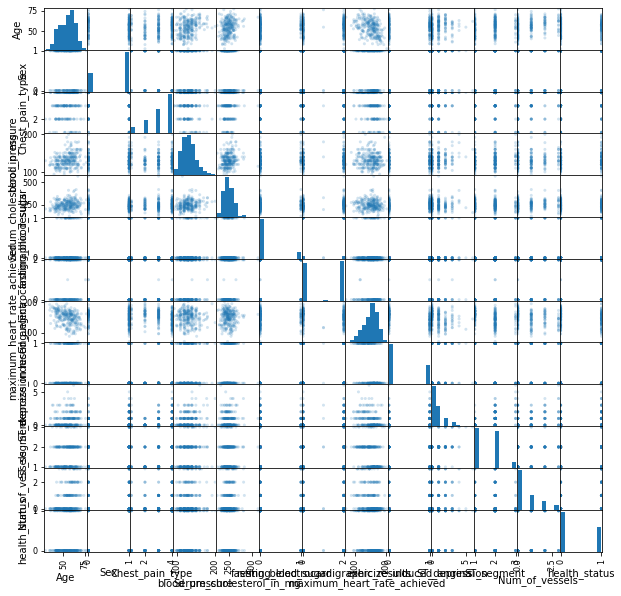

In [49]:
scatter_matrix(df1, alpha=0.2, figsize=(10, 10))
plt.show()

#### Normalize variables 

In [8]:
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType
from pyspark.ml.feature import StringIndexer

In [9]:
assembler = VectorAssembler().setInputCols(['Age','Sex','Chest_pain_type','blood_pressure','Serum_cholesterol_in_mg','fasting_blood_sugar','resting_electrocardigraphic_results','maximum_heart_rate_achieved','exercize_induced_angina','ST_depression','ST_segment','Num_of_vessels']).setOutputCol("vectorized_features")

In [12]:
label_index=StringIndexer().setInputCol('health_status').setOutputCol('label')

In [13]:
scaler=MinMaxScaler().setInputCol('vectorized_features').setOutputCol('features')

#### Establish pipeline

In [17]:
pipeline_stages=Pipeline().setStages([assembler,label_index,scaler])
pipeline_df=pipeline_stages.fit(df2).transform(df2)

#### Baseline Model -- Logistic Regression

In [19]:
train, test = pipeline_df.randomSplit([0.8, 0.2], seed = 2018)

In [23]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

In [24]:
predictions = lrModel.transform(test)

In [25]:
predictions.select(predictions.columns[13:]).show() 

+--------------------+-----+--------------------+--------------------+--------------------+----------+
| vectorized_features|label|            features|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+--------------------+----------+
|[29.0,1.0,2.0,130...|  0.0|(12,[1,2,3,4,6,7]...|[2.49768818203745...|[0.92397959395096...|       0.0|
|[38.0,1.0,1.0,120...|  1.0|[0.1875,1.0,0.0,0...|[0.55611273223419...|[0.63555262532181...|       0.0|
|[39.0,1.0,4.0,118...|  1.0|[0.20833333333333...|[-0.6509589446596...|[0.34277347388701...|       1.0|
|[40.0,1.0,1.0,140...|  1.0|[0.22916666666666...|[1.14726386336393...|[0.75901079561538...|       0.0|
|(12,[0,2,3,4,7,10...|  0.0|(12,[0,2,3,4,7],[...|[2.15098548431185...|[0.89576083076223...|       0.0|
|[41.0,1.0,2.0,110...|  0.0|(12,[0,1,2,3,4,7]...|[1.24259536429781...|[0.77601545187389...|       0.0|
|[41.0,1.0,4.0,110...|  1.0|[0.25,1.0,1.0,0.1...|[1.72956952319705...|[0.

#### Model Evaluation 

In [27]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.6696329254727473


#### Random Forest

In [32]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train)
predictions = rfModel.transform(test)

In [34]:
predictions.select(predictions.columns[13:]).show() 

+--------------------+-----+--------------------+--------------------+--------------------+----------+
| vectorized_features|label|            features|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+--------------------+----------+
|[29.0,1.0,2.0,130...|  0.0|(12,[1,2,3,4,6,7]...|[18.4527306257208...|[0.92263653128604...|       0.0|
|[38.0,1.0,1.0,120...|  1.0|[0.1875,1.0,0.0,0...|[12.9419862125452...|[0.64709931062726...|       0.0|
|[39.0,1.0,4.0,118...|  1.0|[0.20833333333333...|[13.2679008996889...|[0.66339504498444...|       0.0|
|[40.0,1.0,1.0,140...|  1.0|[0.22916666666666...|[15.7324071612268...|[0.78662035806134...|       0.0|
|(12,[0,2,3,4,7,10...|  0.0|(12,[0,2,3,4,7],[...|[17.7625294228999...|[0.88812647114499...|       0.0|
|[41.0,1.0,2.0,110...|  0.0|(12,[0,1,2,3,4,7]...|[17.0376493375360...|[0.85188246687680...|       0.0|
|[41.0,1.0,4.0,110...|  1.0|[0.25,1.0,1.0,0.1...|[15.9826556376935...|[0.

In [33]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.6740823136818688
